## Data understanding - Seatle AirBnB

In [46]:
#Importing standard liabraries for data exploration
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# Uploading AirBnB data sets

calendar_df = pd.read_csv('calendar.csv')

listing_df = pd.read_csv('listings.csv')

reviews_df = pd.read_csv('reviews.csv')

In [48]:
# Rows with some of the missing values

no_nulls_listing = set(listing_df.columns[listing_df.isnull().mean()==0])

print(no_nulls_listing)

{'price', 'calendar_last_scraped', 'neighbourhood_group_cleansed', 'guests_included', 'smart_location', 'description', 'city', 'market', 'calendar_updated', 'extra_people', 'host_verifications', 'availability_90', 'is_location_exact', 'host_url', 'accommodates', 'requires_license', 'name', 'require_guest_profile_picture', 'jurisdiction_names', 'id', 'country_code', 'longitude', 'minimum_nights', 'availability_60', 'instant_bookable', 'picture_url', 'room_type', 'cancellation_policy', 'country', 'latitude', 'calculated_host_listings_count', 'bed_type', 'maximum_nights', 'experiences_offered', 'number_of_reviews', 'scrape_id', 'amenities', 'host_id', 'require_guest_phone_verification', 'street', 'availability_365', 'state', 'availability_30', 'neighbourhood_cleansed', 'listing_url', 'last_scraped', 'has_availability'}


In [49]:
# why some of the numeric vlaues are missing for host?

listing_df[['host_response_time','host_response_rate','host_acceptance_rate']].head(5)

,host_response_time,host_response_rate,host_acceptance_rate
0,within a few hours,96%,100%
1,within an hour,98%,100%
2,within a few hours,67%,100%
3,NaN,NaN,NaN
4,within an hour,100%,NaN


__follow up on host rating__

- convert response_rate and acceptance_rate into numeric values

In [50]:
# converting object % to float

def percentage_to_float(x):
        return float(x.strip('%')) / 100

In [51]:
# Converting response_rate and acceptance_rate into numeric values

listing_df['host_response_rate'] = listing_df['host_response_rate'].fillna('0%').apply(percentage_to_float)

listing_df['host_acceptance_rate'] = listing_df['host_acceptance_rate'].fillna('0%').apply(percentage_to_float)

In [52]:
# why some of the numeric vlaues are missing for price, fee and deposit?

listing_df[['price','weekly_price','monthly_price','security_deposit','cleaning_fee']].head(5)

,price,weekly_price,monthly_price,security_deposit,cleaning_fee
0,$85.00,NaN,NaN,NaN,NaN
1,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00
2,$975.00,NaN,NaN,"$1,000.00",$300.00
3,$100.00,$650.00,"$2,300.00",NaN,NaN
4,$450.00,NaN,NaN,$700.00,$125.00


In [53]:
# converting object % to float

def financial_to_float(x):
        x = x.replace(",", "")
        return float(x.strip('$'))

In [54]:
# Converting response_rate and acceptance_rate into numeric values

financials = ['price','weekly_price','monthly_price','security_deposit','cleaning_fee']

for i in financials:
    listing_df[i] = listing_df[i].fillna('$0').apply(financial_to_float)

In [55]:
# Checking results

listing_df[['price','weekly_price','monthly_price','security_deposit','cleaning_fee']].head(5)

,price,weekly_price,monthly_price,security_deposit,cleaning_fee
0,85.0,0.0,0.0,0.0,0.0
1,150.0,1000.0,3000.0,100.0,40.0
2,975.0,0.0,0.0,1000.0,300.0
3,100.0,650.0,2300.0,0.0,0.0
4,450.0,0.0,0.0,700.0,125.0


In [56]:
# Splitting for numeric and categorical variables

cat_listing_df = listing_df.select_dtypes(include=['object'])

var_listing_df = listing_df.select_dtypes(include=np.number)

In [57]:
# Looking into correlation between numeric variables

listing_corr_clean = var_listing_df.drop(columns=['id','scrape_id','host_id','latitude',
                                                'longitude','license','host_listings_count',
                                               'calculated_host_listings_count',
                                               'host_total_listings_count'])

<AxesSubplot:>

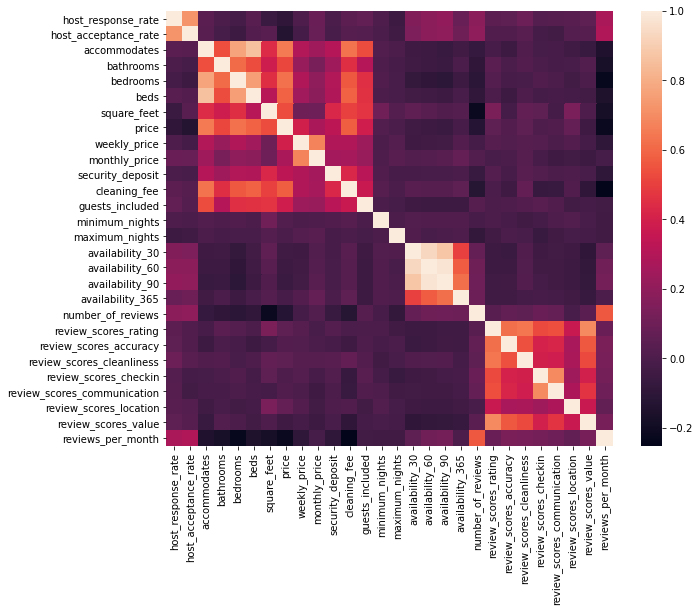

In [58]:
# Correlation heatmap

plt.subplots(figsize=(10,8))
sns.heatmap(listing_corr_clean.corr())

### Looking into correlations

__Host rate__

- host_response_rate
- host_acceptance_rate

interesting that response rate and acceptance rate are highly correlated: could be the case that hosts who response with their tenants are more likely accept their requests?

__Size of a property__

- accomadates
- bathrooms
- bedrooms
- beds
- guests included 
- square feet

potentially we can keep only: beds and square feet as these are the least correlated features and can compliment each other.

__Availability__

- availability_30
- availability_60
- availability_90
- availability_365

Interesting observation: all 30,60 & 90 days are highly correlated which tells potentially indicated that popular properties are always booked and less poppular are more likely to be available

__Reviews__

- review_scores_rating
- review_scores_accuracy
- review_scores_cleanliness
- review_scores_checkin
- review_scores_communication
- review_scores_location
- review_scores_value 

potentially we can keep: review_scores_rating, review_scores_location and review_per_month as these are less corelated

In [59]:
# calculating % of missing data

most_missing_cols = set(listing_df.columns[listing_df.isnull().mean() > 0.75])

half_missing_cols = set(listing_df.columns[listing_df.isnull().mean() > 0.5])

thirty_percent_missing_cols = set(listing_df.columns[listing_df.isnull().mean() > 0.3])

ten_percent_missing_cols = set(listing_df.columns[listing_df.isnull().mean() > 0.1])

print(most_missing_cols, '75% missing')

print(half_missing_cols, '50% missing')

print(thirty_percent_missing_cols, '30% missing')

print(ten_percent_missing_cols, '10% missing')

{'license', 'square_feet'} 75% missing
{'license', 'square_feet'} 50% missing
{'notes', 'license', 'square_feet'} 30% missing
{'neighborhood_overview', 'review_scores_checkin', 'square_feet', 'review_scores_accuracy', 'reviews_per_month', 'review_scores_value', 'license', 'host_about', 'neighbourhood', 'review_scores_communication', 'notes', 'review_scores_rating', 'space', 'review_scores_location', 'transit', 'host_response_time', 'first_review', 'last_review', 'review_scores_cleanliness'} 10% missing


## Looking into missing values

Luckily for us there are few values missing that we've shorlisted for main question of price prediction:

- square_feet - with at least 30% missing

- review_scores_rating, review_scores_location, reviews_per_month with at least 10% missing. 

Reviews missing are likely to be new properties with few ranking - these could be candidates for imputing. 

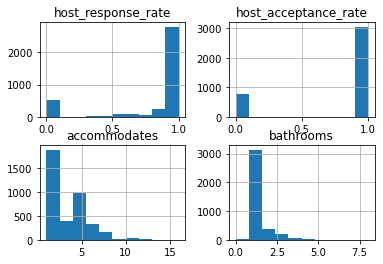

In [60]:
# Looking into distributions
listing_corr_clean.iloc[:, :4].hist();

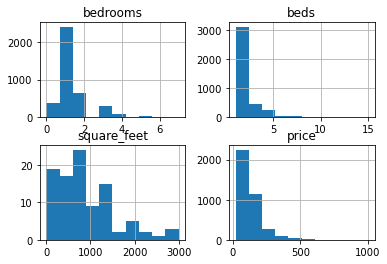

In [61]:
listing_corr_clean.iloc[:, 4:8].hist();

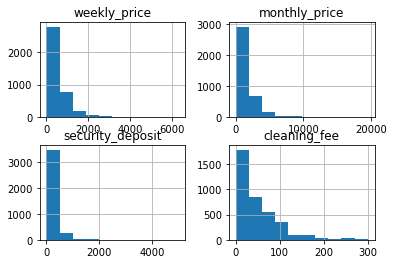

In [63]:
listing_corr_clean.iloc[:, 8:12].hist();

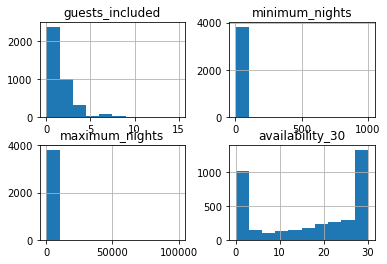

In [64]:
listing_corr_clean.iloc[:, 12:16].hist();

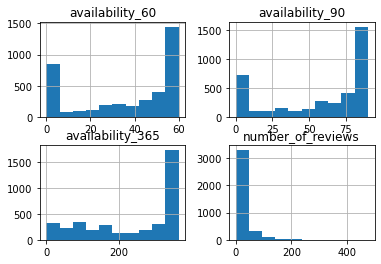

In [65]:
listing_corr_clean.iloc[:, 16:20].hist();

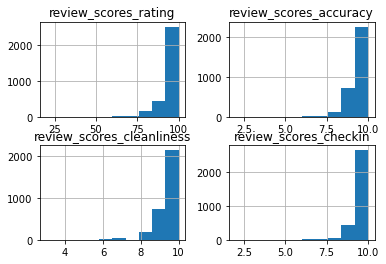

In [66]:
listing_corr_clean.iloc[:, 20:24].hist();

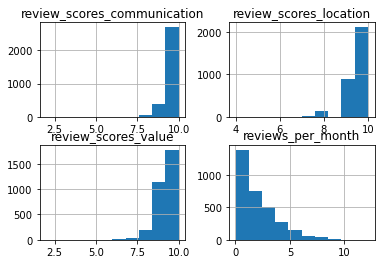

In [67]:
listing_corr_clean.iloc[:, 24:30].hist();
# we can't have histogram for cat values